In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
nan = ['NA','N/A','Na','N/a','na','n/a',np.nan]
df = pd.read_csv(r"Cancer_Data.csv", na_values=nan)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop(columns='Unnamed: 32',axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.drop(columns='id',axis=1,inplace=True)

In [8]:
df.tail(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039


In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


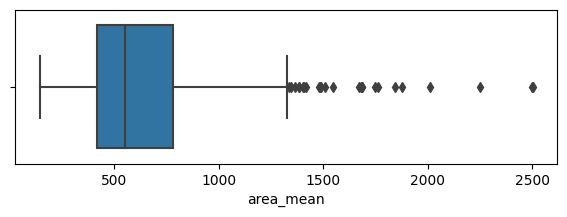

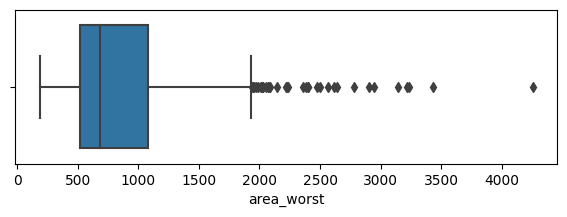

In [10]:
plt.figure(figsize=(7,2))
sb.boxplot(x='area_mean',data=df)
plt.show()

plt.figure(figsize=(7,2))
sb.boxplot(x='area_worst',data=df)
plt.show()

In [11]:
df['area_mean'] = df['area_mean'][df['area_mean']<= 1500]

In [12]:
df['area_worst'] = df['area_worst'][df['area_worst'] <=2500]

In [13]:
df.isnull().sum()

diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                  14
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                 11
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [14]:
df.shape

(569, 31)

In [15]:
numerical_null_list = [var for var in df.columns if df[var].isnull().sum() >0]
numerical_null_list

['area_mean', 'area_worst']

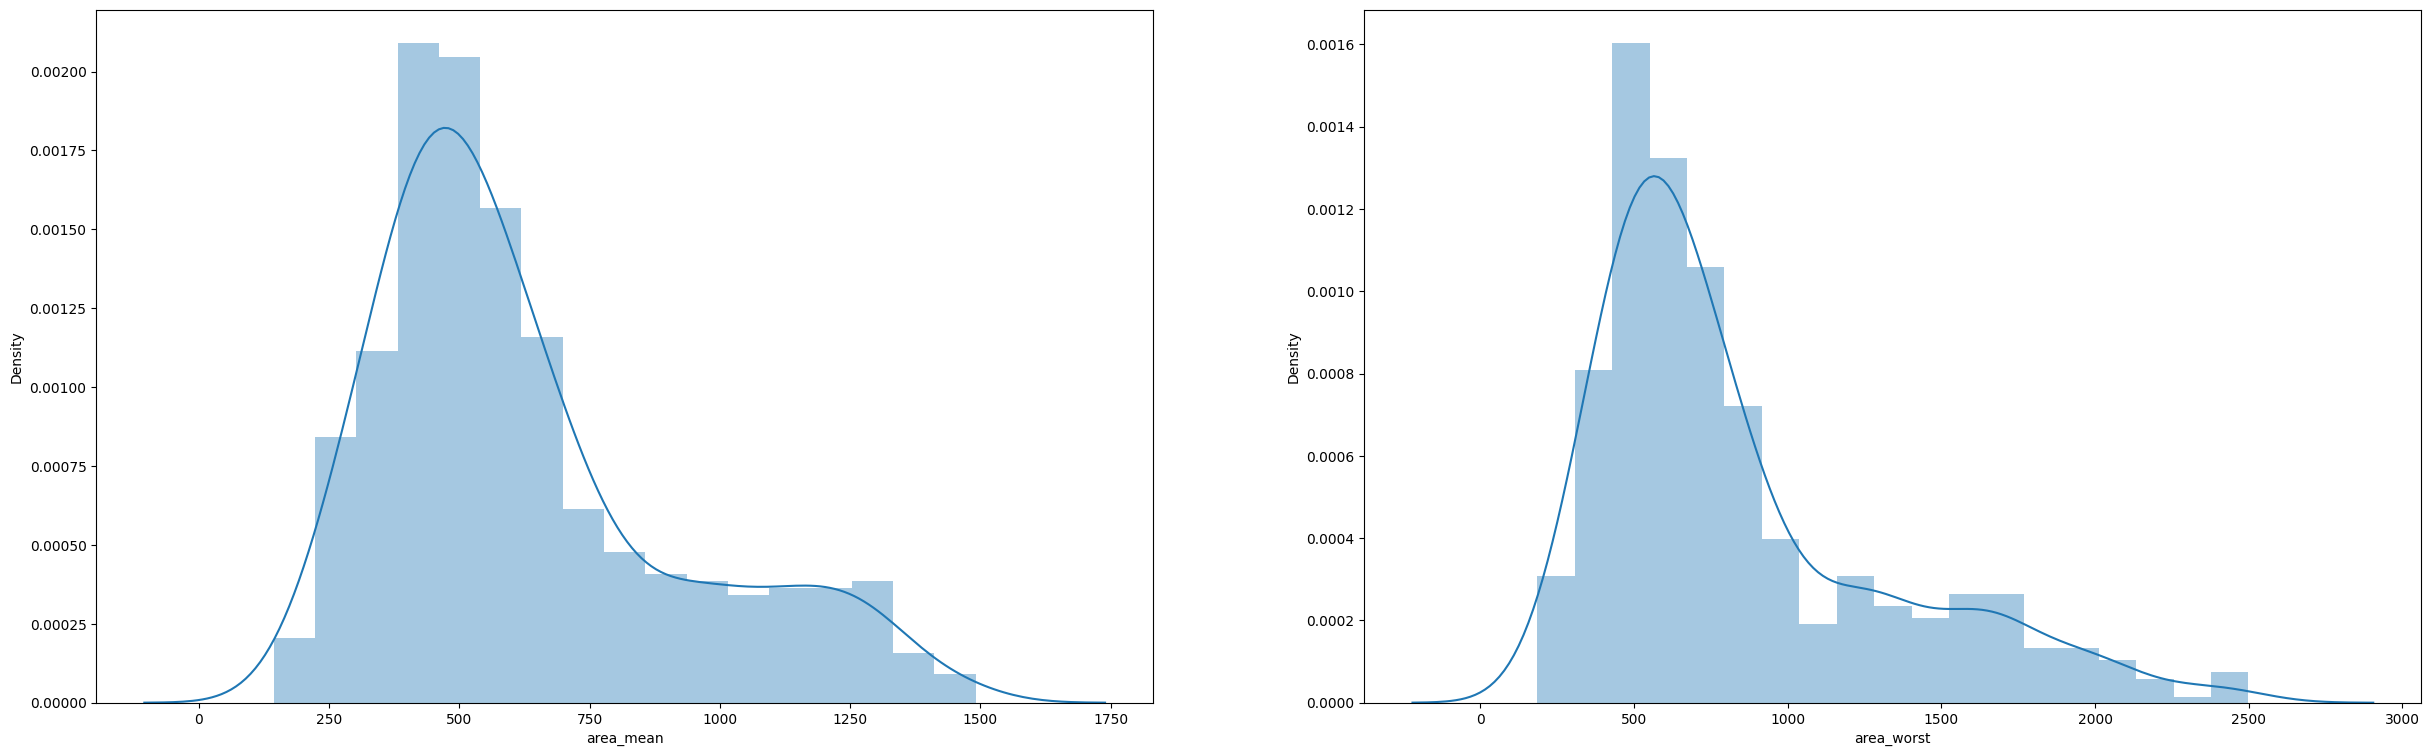

In [16]:
plt.figure(figsize=(30,9))
for i,var in enumerate(numerical_null_list):
    plt.subplot(1,2,i+1)
    sb.distplot(df[var])
plt.show()


In [17]:
df_copy = df.copy()

In [18]:
df_copy['area_mean'] = df_copy['area_mean'].fillna(df_copy['area_mean'].median())
df_copy['area_worst'] = df_copy['area_worst'].fillna(df_copy['area_worst'].median())

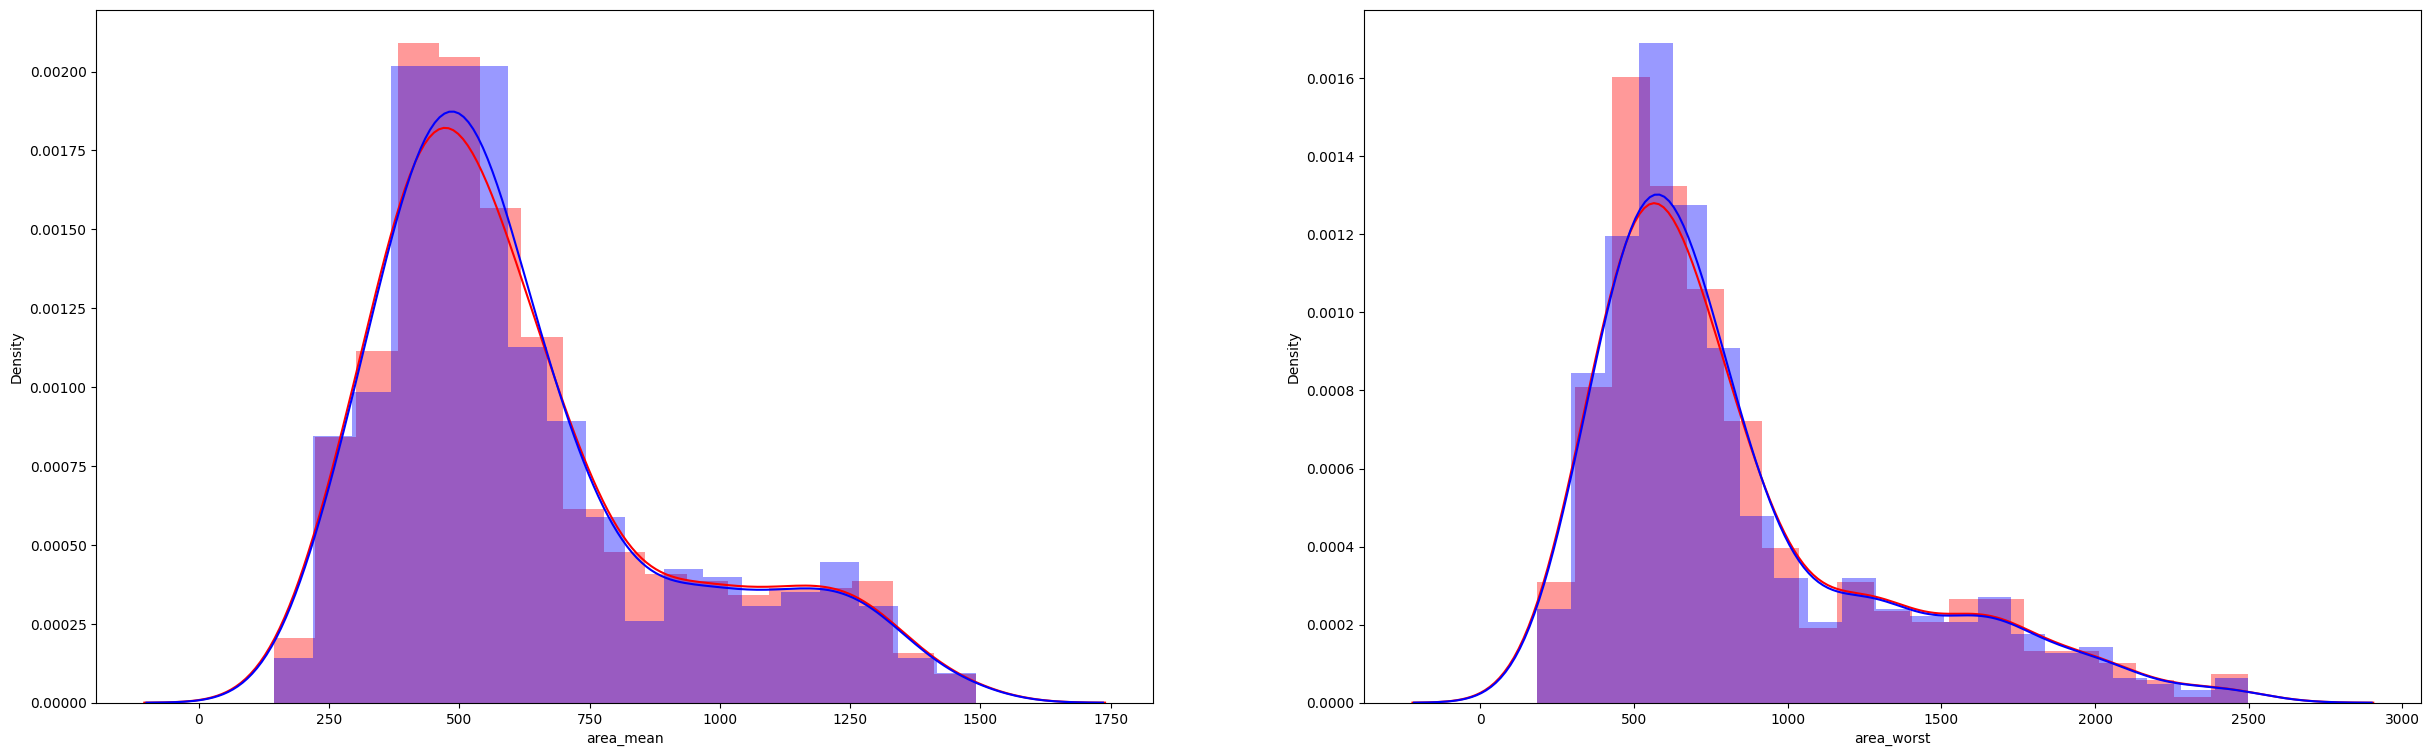

In [19]:
plt.figure(figsize=(30,9))
for i,var in enumerate(numerical_null_list):
    plt.subplot(1,2,i+1)
    sb.distplot(df[var], color='r')
    sb.distplot(df_copy[var], color='b')
    
plt.show()

In [20]:
df = df_copy

In [21]:
df.isnull().sum().sum()

0

In [22]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [23]:
df['diagnosis'] = df['diagnosis'].apply(lambda x:0 if x=='B' else 1)

In [24]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

# MACHINE LEARNING

## Heatmap 

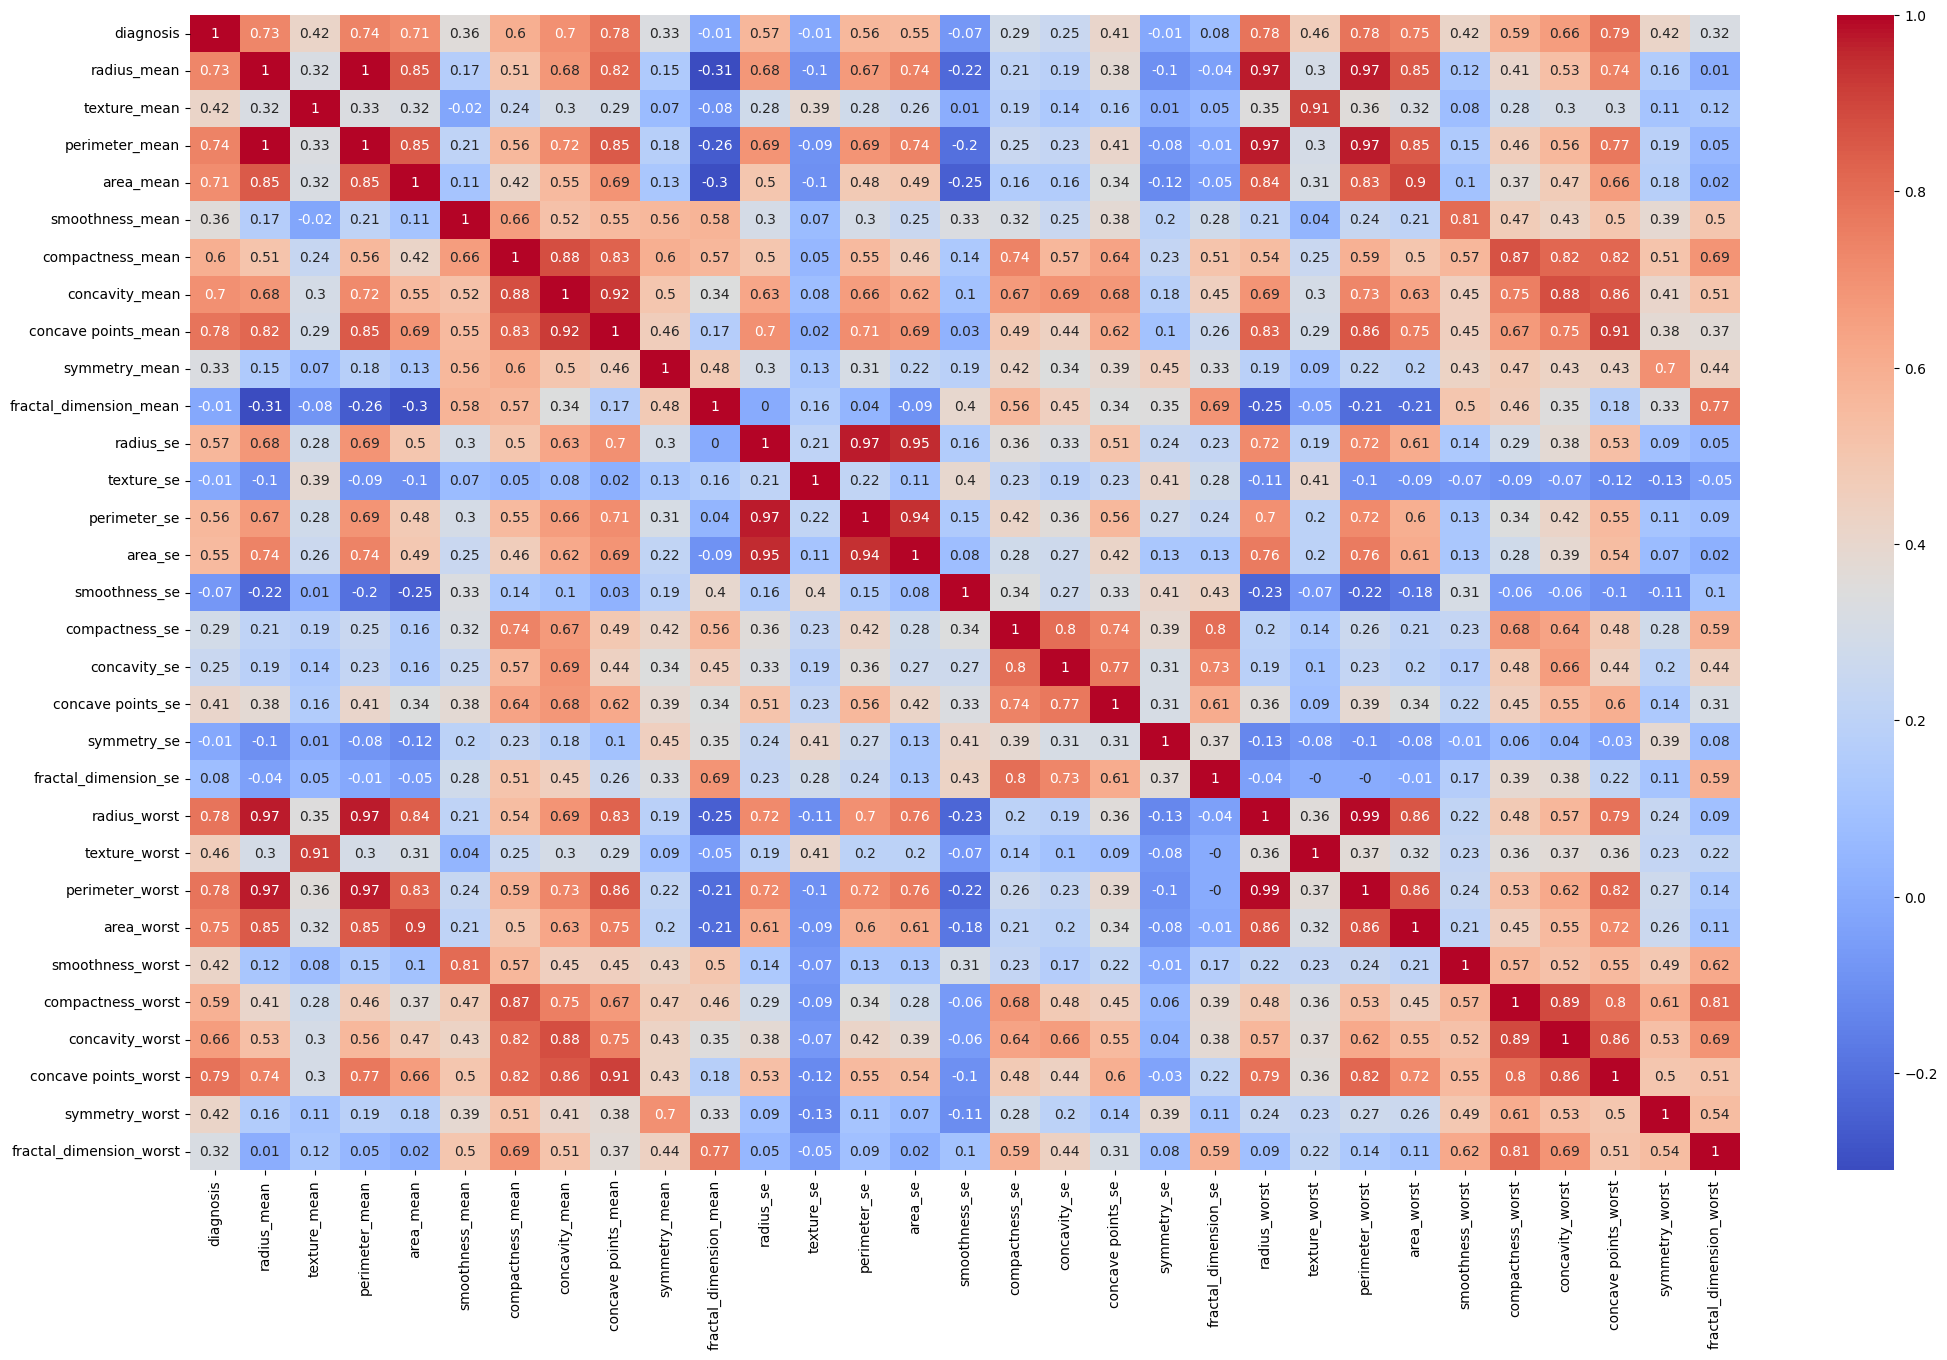

In [25]:
plt.figure(figsize=(25,15))
sb.heatmap(round(df.corr(),2),cmap='coolwarm',annot=True)
plt.show()

## Finding correlation with target column

In [26]:
from scipy.stats import pearsonr

target = 'diagnosis'
corr_with_target = {}

for var in df:
    if target != var:
        corr_with_target[var] = round(pearsonr(df[var], df[target])[0],2)
corr_with_target       

{'radius_mean': 0.73,
 'texture_mean': 0.42,
 'perimeter_mean': 0.74,
 'area_mean': 0.71,
 'smoothness_mean': 0.36,
 'compactness_mean': 0.6,
 'concavity_mean': 0.7,
 'concave points_mean': 0.78,
 'symmetry_mean': 0.33,
 'fractal_dimension_mean': -0.01,
 'radius_se': 0.57,
 'texture_se': -0.01,
 'perimeter_se': 0.56,
 'area_se': 0.55,
 'smoothness_se': -0.07,
 'compactness_se': 0.29,
 'concavity_se': 0.25,
 'concave points_se': 0.41,
 'symmetry_se': -0.01,
 'fractal_dimension_se': 0.08,
 'radius_worst': 0.78,
 'texture_worst': 0.46,
 'perimeter_worst': 0.78,
 'area_worst': 0.75,
 'smoothness_worst': 0.42,
 'compactness_worst': 0.59,
 'concavity_worst': 0.66,
 'concave points_worst': 0.79,
 'symmetry_worst': 0.42,
 'fractal_dimension_worst': 0.32}

In [27]:
almost_zero_corr = [var for var in corr_with_target if (corr_with_target[var]<0.09) & (corr_with_target[var] >-0.70)]
print(len(almost_zero_corr))

target = 'diagnosis'
corr ={}
for var in almost_zero_corr:
    if target != var:
        corr[var] = round(pearsonr(df[var], df[target])[0],2)
corr 

5


{'fractal_dimension_mean': -0.01,
 'texture_se': -0.01,
 'smoothness_se': -0.07,
 'symmetry_se': -0.01,
 'fractal_dimension_se': 0.08}

## Finding Overall Correlation with each other for every columns

In [28]:
def ninty_correlation(data, threshold):
    corr3 = set()
    corr_matrix = df.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                corr3.add(corr_matrix.columns[i])
    return corr3     


In [29]:
overall_corr = ninty_correlation(df, 0.90)
overall_corr


{'area_se',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [30]:
col_for_drop = ['concave points_mean','radius_mean','radius_se','perimeter_mean',
                'fractal_dimension_mean','texture_se','smoothness_se','symmetry_se',
                'fractal_dimension_se']

In [31]:
df.shape

(569, 31)

In [32]:
#sb.pairplot(df,hue='diagnosis')

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='diagnosis', axis=1)
y = df['diagnosis']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (455, 30)
X_test (114, 30)
y_train (455,)
y_test (114,)


In [35]:
X_train.drop(columns=col_for_drop, axis=1, inplace=True)
X_test.drop(columns=col_for_drop, axis=1, inplace=True)

In [36]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (455, 21)
X_test (114, 21)
y_train (455,)
y_test (114,)


In [37]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_columns",None)

In [38]:
X_test.head(2)

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
400,21.02,994.0,0.12300,0.25760,0.31890,0.2113,3.123,41.51,0.03718,0.06165,0.01051,20.80,27.78,149.6,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980
225,13.47,641.2,0.09906,0.07624,0.05724,0.2075,3.763,48.29,0.01428,0.02360,0.01286,16.77,16.90,110.4,873.2,0.1297,0.1525,0.1632,0.1087,0.3062,0.06072


In [39]:
X_test.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test  = sc.transform(X_test)

In [41]:
import pickle
pickle.dump(sc,open('scaling.pkl','wb'))

## ML Model Training

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

In [43]:
log = LogisticRegression()
rg  = RidgeClassifier()
sgd = SGDClassifier()
svc = SVC()
dt  = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf  = RandomForestClassifier()
bag = BaggingClassifier()
gb  = GradientBoostingClassifier()
gp  = GaussianProcessClassifier()
xg  = XGBClassifier()
xgbr= XGBRFClassifier()

In [44]:
models = {
    
    'a' : ['LogisticRegression',log],
    'b' : ['RidgeClassifier',rg],
    'c' : ['SGDClassifier',sgd],
    'd' : ['SVC',svc],
    'e' : ['DecisionTreeClassifier',dt],
    'f' : ['KNeighborsClassifier',knn],
    'g' : ['RandomForestClassifier',rf],
    'h' : ['BaggingClassifier',bag],
    'i' : ['GradientBoostingClassifier',gb],
    'j' : ['GaussianProcessClassifier',gp],
    'k' : ['XGBClassifier',xg],
    'l' : ['XGBRFClassifier',xgbr]
    
}

## Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, make_scorer

def test_model(each_model, X_train= X_train, y_train= y_train):
    
    cross_valid = KFold(n_splits=5, shuffle=True, random_state=100)
    r2 = make_scorer(r2_score)
    
    each_r2_val_score = cross_val_score(each_model, X_train, y_train, cv=cross_valid)
    score = [each_r2_val_score.mean()]
    
    return score

In [46]:
##in models[0] = model name and models[1] = score exist

model_score = []

for var in models:
    print('Training Model : ', models[var][0])             #[0] = model name
    score = test_model(models[var][1], X_train, y_train)   #[1] = model score
    
    print('Score          : ',score[0])                     #[0] = removing third bracket
    model_score.append([models[var], score])
    print('\n')

Training Model :  LogisticRegression
Score          :  0.9780219780219781


Training Model :  RidgeClassifier
Score          :  0.9538461538461538


Training Model :  SGDClassifier
Score          :  0.9626373626373625


Training Model :  SVC
Score          :  0.9780219780219781


Training Model :  DecisionTreeClassifier
Score          :  0.9384615384615385


Training Model :  KNeighborsClassifier
Score          :  0.9626373626373625


Training Model :  RandomForestClassifier
Score          :  0.9604395604395604


Training Model :  BaggingClassifier
Score          :  0.9494505494505494


Training Model :  GradientBoostingClassifier
Score          :  0.9538461538461538


Training Model :  GaussianProcessClassifier
Score          :  0.9692307692307693


Training Model :  XGBClassifier
Score          :  0.9582417582417582


Training Model :  XGBRFClassifier
Score          :  0.945054945054945




## No Need of Hyper Parameter Tuning

## Train Model

In [47]:
log.fit(X_train,y_train)
log_score = log.score(X_test,y_test)

print(log_score)

0.9824561403508771


In [48]:
log_pred = log.predict(X_test)
log_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [49]:
y_test.head(20)

400    1
225    0
321    1
173    0
506    0
380    0
197    1
260    1
40     1
160    0
391    0
417    1
265    1
254    1
308    0
184    1
54     1
267    0
103    0
142    0
Name: diagnosis, dtype: int64

# Save Model

### Pickle saving

In [50]:
import pickle
  
#save model
pickle.dump(log,open('Cancer_Prediction.pkl','wb'))
  
# Load the model from the file
logistic_model = pickle.load(open('Cancer_Prediction.pkl','rb'))
  
# Use the loaded model to make predictions
logistic_model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0], dtype=int64)

# Deployment

In [51]:
X_test[0]

array([ 0.41252627,  1.3634606 ,  1.97500668,  3.06806162,  3.12041291,
        1.18965162,  0.16458451,  0.06829091,  0.6537488 ,  1.13383459,
       -0.22610615,  1.01576158,  0.36413034,  1.35944092,  1.05787239,
        2.55007315,  2.24211308,  3.21624802,  1.30864299,  0.64585552,
        2.1018241 ])

X_test= ['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [52]:
print(X_test[0])

[ 0.41252627  1.3634606   1.97500668  3.06806162  3.12041291  1.18965162
  0.16458451  0.06829091  0.6537488   1.13383459 -0.22610615  1.01576158
  0.36413034  1.35944092  1.05787239  2.55007315  2.24211308  3.21624802
  1.30864299  0.64585552  2.1018241 ]


In [53]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## Prediction

In [54]:
X_test[0]

array([ 0.41252627,  1.3634606 ,  1.97500668,  3.06806162,  3.12041291,
        1.18965162,  0.16458451,  0.06829091,  0.6537488 ,  1.13383459,
       -0.22610615,  1.01576158,  0.36413034,  1.35944092,  1.05787239,
        2.55007315,  2.24211308,  3.21624802,  1.30864299,  0.64585552,
        2.1018241 ])

In [55]:
logistic_model.predict(sc.transform(X_test[0].reshape(1,-1)))

array([1], dtype=int64)

In [56]:
log.predict(sc.transform(X_test[0].reshape(1,-1)))

array([1], dtype=int64)